# Aprendizaje Supervisado

Los temas que trataremos de aprendizaje supervisado son:

* Regresion lineal
* regresion logistica
* Redes neuronales
* SVM: Support Vector Machines (Maquinas de soporte vectorial)

## Regresion lineal.
Asumamos que usted quiere vender su casa de 1000 ft$^2$ y quiere saber por cuanto. Recolecta datos de casas vecinas y en la ciudad y los datos son 
de la forma $(x_i, y_i)$ con $x_i$ el tamano en pies cuadrados y $y_i$ el valor (**etiqueta**). Advertencia: El solo tamano de la casa no es suficiente para hacer una buena precision. Se requieren otros parametros (features) tales como cercania a puesto de trabajo, o al centro, o a la zona industrial, o estrato, numero de cuartos. 

Queremos una relacion lineal con los parametros $\theta$. 

Tenemos entonces

\begin{eqnarray}
y_1 &=& \theta_0  + x_1 \theta_1 \\
y_2 &=& \theta_0 + x_2 \theta_1 \\
&\vdots & \\
y_m &=& \theta_0 + x_m \theta_1 
\end{eqnarray}

Esto puede puede escribir en forma matricial como

$Y = X \theta$ donde

$$ Y = \begin{pmatrix} y_1 \\ y_2 \\ \vdots \\ y_m \end{pmatrix}  
\quad , \quad X= \begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_m \end{pmatrix} \quad \theta = \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} $$

$$\begin{pmatrix} 1 & x_1 \\ 1 & x_2 \\ \vdots & \vdots \\ 1 & x_m \end{pmatrix}  \begin{pmatrix} \theta_0 \\ \theta_1 \end{pmatrix} = ? $$

El problema que queremos resolver es, halle $\theta$ tal que
$X \theta = Y$. 

Aca viene toda el algebra lineal del segundo capitulo.

Las columnas de la matriz $X$ son linealmente indendientes. Segun esto
$X^T X$ tiene inversa. Resolvemos el problema de minimos cuadrados
$\min_{\theta} \| X \theta - Y \|^2$, es decir

$$ X^T X  \theta = X^T y $$ , la solucion es:

$$ \theta = (X^T X)^{-1} X^T y $$
Vamos a usar, por conveniencia la notacion $A=X^T X$, $b=X^T y$
y resolvemos $A \theta = b$, donde $A$ es invertible.

$$ x = A^{-1} b$$. 

import os

In [1]:
ls

sample_data/


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/MyDrive/ColabNotebooks/MachineLearning2022-2


/content/gdrive/MyDrive/ColabNotebooks/MachineLearning2022-2


In [4]:
ls


class1.ipynb  class4.ipynb  class7.ipynb
class2.ipynb  class5.ipynb  house_size_price.txt
class3.ipynb  class6.ipynb  linearRegression.ipynb


In [9]:
more house_size_price.txt


In [11]:
cat house_size_price.txt

     820      70000
     910      83000
    1100      75000
    1100      93000
    1400      90000
    1400      80000
    1500      85000
    1600     114000
    1804     150000
    2010     160050
    2040     170000
    2500     175000
    3200     180000
    3400     190000



In [12]:
man cat

In [13]:
more house_size_price.txt

In [14]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('house_size_price.txt')
data


array([[   820.,  70000.],
       [   910.,  83000.],
       [  1100.,  75000.],
       [  1100.,  93000.],
       [  1400.,  90000.],
       [  1400.,  80000.],
       [  1500.,  85000.],
       [  1600., 114000.],
       [  1804., 150000.],
       [  2010., 160050.],
       [  2040., 170000.],
       [  2500., 175000.],
       [  3200., 180000.],
       [  3400., 190000.]])

In [15]:
x= data[:,0]
x

array([ 820.,  910., 1100., 1100., 1400., 1400., 1500., 1600., 1804.,
       2010., 2040., 2500., 3200., 3400.])

In [16]:
x.shape

(14,)

In [18]:
y  = data[:,1]
y

array([ 70000.,  83000.,  75000.,  93000.,  90000.,  80000.,  85000.,
       114000., 150000., 160050., 170000., 175000., 180000., 190000.])

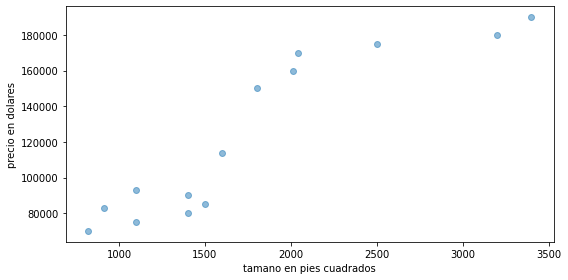

In [19]:
# grafique
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x,y, alpha=0.5)
ax.set_xlabel("tamano en pies cuadrados")
ax.set_ylabel("precio en dolares")
plt.tight_layout()
plt.show()

In [21]:
## El problema de minimos cuadrados
# columna de unos
n = x.size
n

14

In [23]:
ones = np.ones( shape=(n,1), dtype='float')
X = np.column_stack((ones,x))
X

array([[1.000e+00, 8.200e+02],
       [1.000e+00, 9.100e+02],
       [1.000e+00, 1.100e+03],
       [1.000e+00, 1.100e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.400e+03],
       [1.000e+00, 1.500e+03],
       [1.000e+00, 1.600e+03],
       [1.000e+00, 1.804e+03],
       [1.000e+00, 2.010e+03],
       [1.000e+00, 2.040e+03],
       [1.000e+00, 2.500e+03],
       [1.000e+00, 3.200e+03],
       [1.000e+00, 3.400e+03]])

In [24]:
XT = X.transpose()
XTX = XT.dot(X)
XTX

array([[1.4000000e+01, 2.4784000e+04],
       [2.4784000e+04, 5.2156616e+07]])

In [25]:
XTXInv = np.linalg.inv(XTX)
XTXInv

array([[ 4.49835530e-01, -2.13754738e-04],
       [-2.13754738e-04,  1.20745898e-07]])

In [26]:
b=XT.dot(y)
b

array([1.7150500e+06, 3.4642305e+09])

In [27]:
theta = XTXInv.dot(b)
theta

array([30994.74367923,    51.69155861])

$X \theta =y$, 

$\theta = X^+ y $

In [29]:
theta2 = np.linalg.pinv(X).dot(y)
theta2

array([30994.74367923,    51.69155861])

In [30]:
theta-theta2

array([ 0.00000000e+00, -7.10542736e-15])

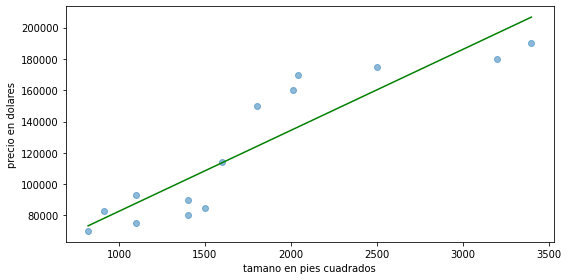

In [34]:
# Graficamos los datos junto con la linea de regresion
# definamos la linea de regresion
def f(x): return theta[1]*x + theta[0]
fig, ax = plt.subplots(figsize=(8,4))
ax.scatter(x,y, alpha=0.5)
ax.set_xlabel("tamano en pies cuadrados")
ax.set_ylabel("precio en dolares")
plt.plot(x, f(x), color='g')
plt.tight_layout()
plt.show()



## Metodos de gradiente.
El metodo de las ecuaciones normales es analitico y se ve interesante, sin embargo tiene dos desventajas.

1. Es lento para matrices grandes (de dimensiones mayores a un millon)
2. Cuando el problema no es lineal las ecuaciones normales no entran en juego. La funcion objetivo $J(\theta)$ es cuadratica. Para no lineales
la ecuacion es mas alla de cuadratica.

Como una introduccion, salgamonos a un mundo por encima de los metodos de gradiente, y luego nos enfocamos en los metodos de gradiente. Con esto entenderemos mejor el contexto.

Si queremos resolver un problema lineal $A \theta = b$
existen varias tecnicas, asumamos $A$ ya es cuadrada y tiene inversa. Simetrica, Positiva definida.

1. No interativas:
    * Eliminacion Gaussiana ($A=LU$).
    * Cholesky ($A=L L^T$).
    * $QR$, donde $A=QR$, $Q$ es ortogonal y $R$ es triangular.
    * Crammer.

2. Iterativas :        
    * Metodos estacionarios. $A$ no cambia.
        * Se parte la matriz $A$ en tres pedazos:
        $A=L + D + U$, el sistema $A \theta = b$,
        se parte en dos, por ejemplo se deja $L+D$ a la izquierdad y se pasa el $U$ a la derecha: esto genera metodos como Jacobi, Gauss-Seidel, Overrelaxtion.
        * Metodos no estacionarios: El problema se redefine en cada paso. Aca estan los metodos de Newton, el SD: Steeepest DEscent (maximo descenso) y el CG: Conjugate Gradient (gradiente conjugado). 



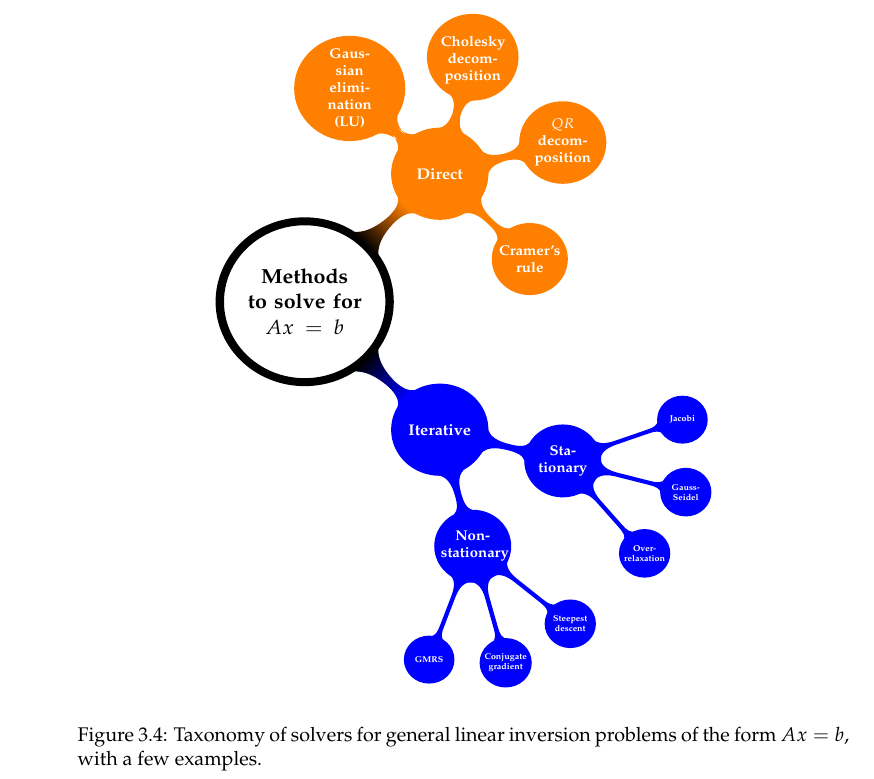

En general los problemas no son lineales y hay metodos mas poderosos para problemas no lineales: redes neuronales (dos o tres semanas). Hay otros que menciono a continuacion:

* Algoritmos Evolutivos: se basan en evolucion biologica : reproduccion, mutacion, seleccion, etc. De estos hay dos populares: 
[particle swarm optimization](https://en.wikipedia.org/wiki/Particle_swarm_optimization#/media/File:ParticleSwarmArrowsAnimation.gif)
Otro metodo es 
[genetic algorithms](https://en.wikipedia.org/wiki/Genetic_algorithm).

* Los metodos de descenso usando gradiente.
    * Steepest Descent (SD): Descenso maximo. Lo explicamos a continuacion
    * Conjugate Gradient (Gradiente conjugado), lo vemos por un ladito. 
    * Metodos de Newton. Si hay que calcular el Hessian, son muy costosos. Entonces los quasi-newton que solo usan el Hessian a lo largo de la diagonal.
    * SGD: Stochastic Gradient Descent. Es eficiente y se usa en ANN: Artificial Neural Networks.


En este curso nos enfocaremos solo en el gradiente y sus metodos.


$$ J=\frac12 \| X \theta - y \|^2 = \frac12 \| h(\theta,x) - y \|^2 = \frac12 \sum_{i=1}^m ( h(\theta, x^{(i)}) - y_i)^2$$

donde la **hipotesis** $h(\theta, x) = X \theta$. 

Debemos hallar el gradiente de $J$, $\nabla J$. 

Recuerde $h(\theta, x) = X \theta = \sum_{j=1}^n X_{ij} \theta_j$

\begin{eqnarray}
\frac{\partial J}{\partial \theta_k} = \sum_{i=1}^m (h(\theta, x^{(i)})-y_i) x_{ik}
\end{eqnarray}

Para la tarea: Las iteraciones se definen como

$$ \theta_k = \theta_{k-1} - \alpha \nabla J_{\theta}(\theta_{k-1}) $$
El $\alpha$ se provee (creo que es $\alpha=0.2$, debe haber un numero maximo de iteraciones. 

Del calculo multidimensional tenemos la ecuacion de la derivada direccional en la direccion $u$, donde $\| u \| =1$:

$$ \frac{\partial J}{\partial u}  = \nabla J \cdot u $$.
De nuestras clases de geometria analitica

$$ \nabla J \cdot u =  \| \nabla J \| \| u \| \cos \beta = \| \nabla J \| \cos \beta $$. $\beta$ es el angulo entre el gradiente y la direccion $u$.
Entonces para $\beta=0$ tenemos la maxima derivada direccional, de tamano igual al gradiente. Para $\beta=\pi$ vamos bajando a la maxima pendiente con direccion $- \nabla J$. Si la direccion se requiere unitaria:

$$ u = - \frac{\nabla J(\theta) }{ \| \nabla J(\theta) \|}$$.

La pregunta en este momento es como escogemos a $\alpha$?





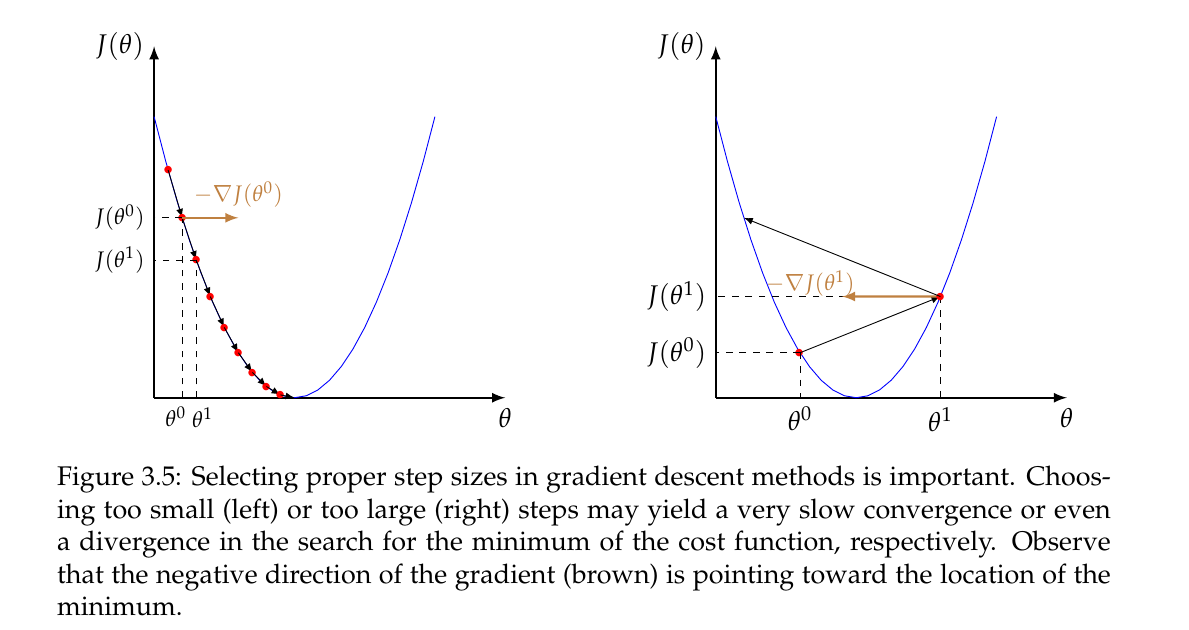

Encontrar el $\alpha$ optimo no es facil. Pero si el problema es lineal $A\theta = b$ existen varias tecnicas.

### Busqueda de $\alpha$ usando SD: Steepest Descent (Descenso maximo).
A este tipo de algoritmos se les conoce como **line search**.

Asumamos que arrancamos en $\theta_0$. La direccion de maximo descenso es la negativa del gradiente. El proximo paso (valor de $\theta$, es decir $\theta_1$) es $\theta_0 - \alpha \nabla J(\theta_0)$.  Quien es $\alpha$?


Para hallar $\alpha$ creamos una funcion de ayuda (auxiliar):

$$\varphi(\alpha) = J [ \theta_0 - \alpha \nabla J(\theta_0)] $$
El $\alpha$ optimo es el que me minice esta funcion, como funcion de $\alpha$, el que baja mas veloz. Pero $\varphi$ es una funcion de una variable real y podemos tomar la derivada e igualarla a 0.  Usamos la regla de la cadena.

$$ \varphi'(\alpha) = \nabla J[ \theta_0 - \alpha J(\theta_0)] \cdot \nabla J(\theta_0) = 0 \quad (1) $$. Queremos resolver esta ecuacion par $\alpha$ pero no es claro como.

$$ \theta_1 = \theta_0 - \alpha \nabla J(\theta_0) \quad (2) $$. En este momento tenemos dos puntos $\theta_0, \theta_1$. Ademas la ecuacion (1) indica
que las dos direcciones son ortogonales. Cuales direcciones? 
$\nabla J(\theta_0)$ y la otra es $\nabla J(\theta_1)$. 
Multiplicamos la ecuacion (2) por $A$ y le restamos $b$


$$ A \theta_1 - b = A \theta_0 - b - \alpha A \nabla J(\theta_0) \quad (3) $$
Definamos residuales.

$$ r_0 = A \theta_0 - b = \nabla J(\theta_0) $$,
$$ r_1 = A \theta_1 - b = \nabla J(\theta_1) $$

Escribamos la ecuacion (3) en terminos de los residuales $r_i$.

$$r_1 = r_0 - \alpha A r_0 $$
de la ortogonalidad en la ecuacion (1), tenemos que $r_1 \cdot r_0 = 0$. 
 Podemos multiplicar (punto) la ecuacion anterior a ambos lados por $r_0$.


$$r_0^T r_1   = r_0^T r_0  - \alpha r_0^T A r_0 $$
$$ 0 =  \| r_0 \|^2 - \alpha r_0^T A r_0 $$

De donde 

$$ \alpha = \frac{\| r_0 \|^2 }{r_0^T A r_0} $$. El denominador no es 0 por que $A$ es positiva definidas.  Con esto escribimos el algoritmo de SD.










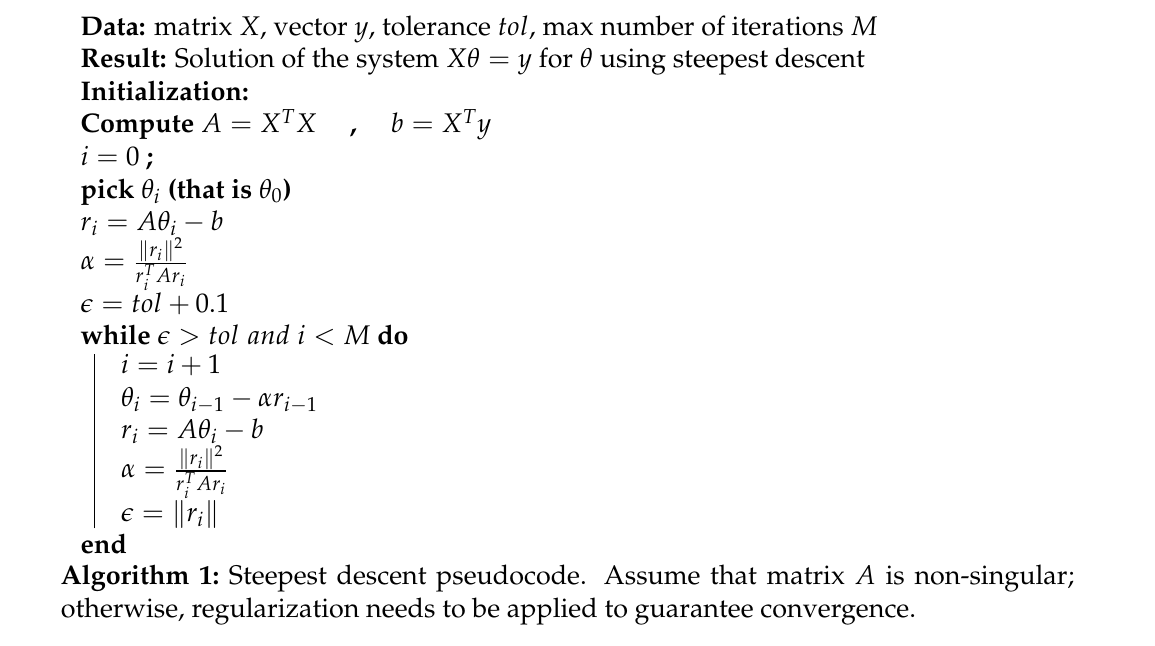